In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# import STMpy
import sys
sys.path.insert(0, "C:\\Users\\Charlie\\Documents\\GitHub") # the path where STMpy is downloaded
import STMpy

## Read Topo

In [17]:
# import topo
import nanonispy as nap
scan=nap.read.Scan("C:\\Users\\Charlie\\Desktop\\SnSe2\\STM1 Run #76 SnSe2\\Area 5\\300mK\\scan058.sxm")
topo_original=scan.signals.get("Z").get("forward")

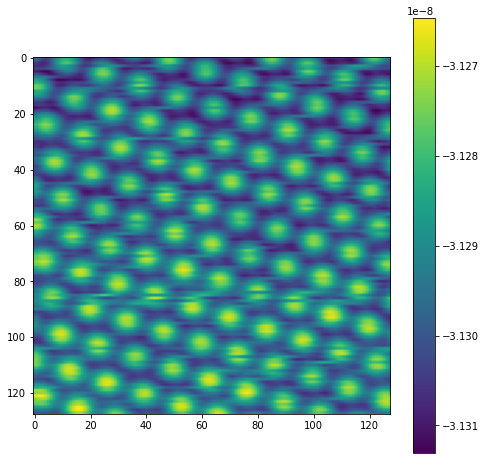

In [18]:
# Plot Topo
plt.figure(figsize=(8,8))
plt.imshow(topo_original,origin='upper')
plt.colorbar()
plt.show()
# background linear signal covered topography

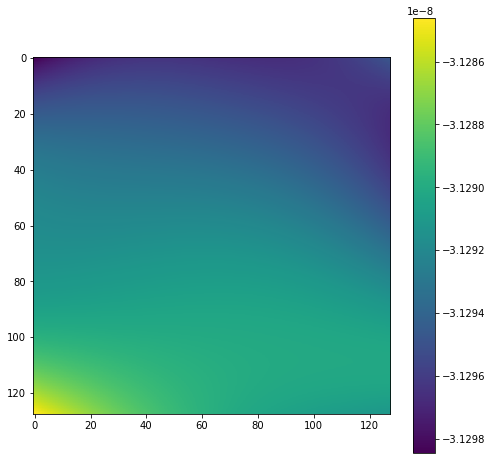

In [19]:
fitted_surf = STMpy.Topo.fitPolySheet(topo_original)
plt.figure(figsize=(8,8))
plt.imshow(fitted_surf,origin='upper')
plt.colorbar()
plt.show()

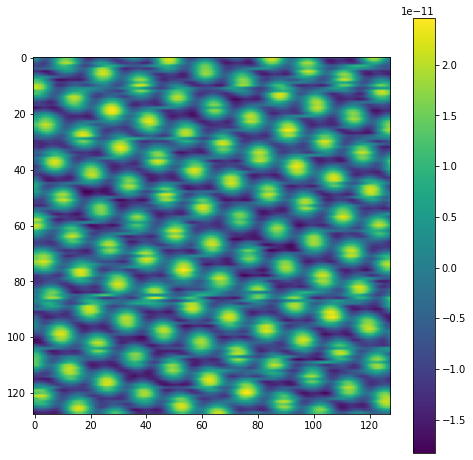

In [20]:
topo_corrected = topo_original-fitted_surf

plt.figure(figsize=(8,8))
plt.imshow(topo_corrected,origin='upper')
plt.colorbar()
plt.show()

In [21]:
# Check channels
scan.signals.keys()

dict_keys(['Z', 'Lockin_X', 'Lockin_Y', 'Current'])

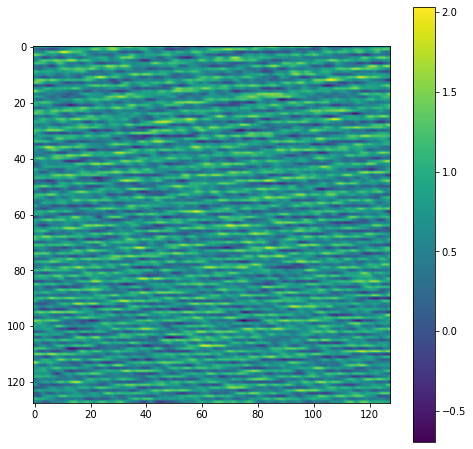

In [22]:
# Plot Lockin_X
lockin_original = scan.signals["Lockin_X"]["forward"]+0.7
plt.figure(figsize=(8,8))
plt.imshow(lockin_original,origin='upper')
plt.colorbar()
plt.show()

## Import a dIdV vs Z curve and make an exponential fit.

In [23]:
zSpec = nap.read.Spec("C:\\Users\\Charlie\\Desktop\\SnSe2\\Z-Spectroscopy001.dat")

In [24]:
for key in zSpec.signals.keys():
    print(key)

Z rel (m)
Current (A)
Lockin X/R (V)
Bias (V)
Current [bwd] (A)
Lockin X/R [bwd] (V)
Bias [bwd] (V)


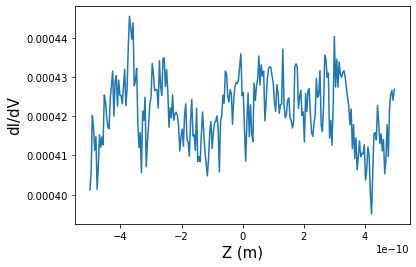

In [25]:
plt.plot(zSpec.signals["Z rel (m)"],zSpec.signals["Lockin X/R (V)"])
plt.xlabel("Z (m)",size=15)
plt.ylabel("dI/dV",size=15)
plt.show()

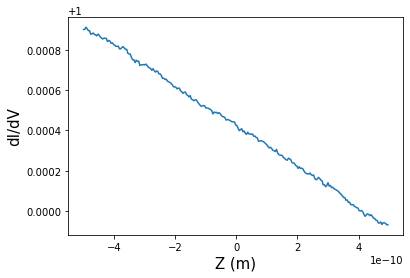

In [26]:
# create fake data by adding an exponential to this.
fakedata = zSpec.signals["Lockin X/R (V)"] + 2.71**(-zSpec.signals["Z rel (m)"]*10**6)
plt.plot(zSpec.signals["Z rel (m)"],fakedata)
plt.xlabel("Z (m)",size=15)
plt.ylabel("dI/dV",size=15)
plt.show()

### Do least-squares exponential curve fit with scipy

In [27]:
def exp(z,a,b):
    return a*np.exp(-b*z)

In [28]:
from scipy.optimize import curve_fit

In [29]:
params, covar = curve_fit(f=exp, xdata=zSpec.signals["Z rel (m)"]*10**10, ydata=fakedata, p0=[1.0,0.0], bounds=(-np.inf, np.inf))

In [30]:
params

array([1.00042140e+00, 9.99274221e-05])

### Use the computed decay factor plus the Z map (smoothed) to find a correction factor for the lockin layer.

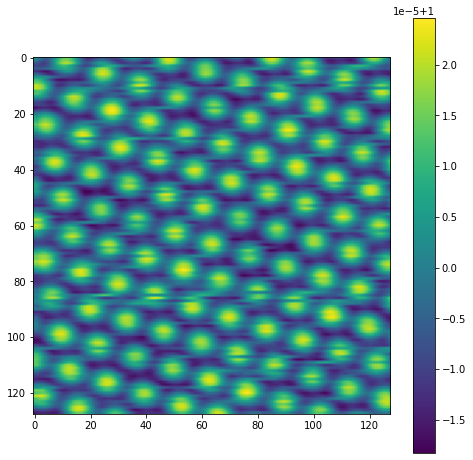

In [31]:
scale = exp(topo_corrected*10**10,1,-params[1])
# Plot correction
plt.figure(figsize=(8,8))
plt.imshow(scale,origin='upper')
plt.colorbar()
plt.show()

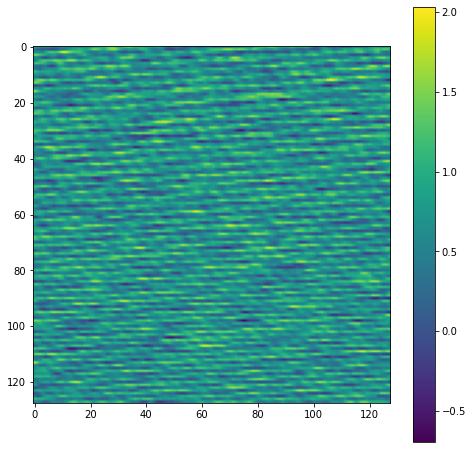

In [33]:
lockin_corrected = np.multiply(scale, lockin_original)

# Plot corrected lockin channel
plt.figure(figsize=(8,8))
plt.imshow(lockin_corrected,origin='upper')
plt.colorbar()
plt.show()